<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/main/nb/Chapter9.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch. 9 - Music analysis

This is a very simple demonstration of several built-in analytical functions in music21. We carry out a reduction of Bach chorale, analysis of harmony using Roman numerals and add Lerdahl and Jackendof type of metrical hierarchy.


## Install Music21 (in Colab)

The first code segment is to install `music21` and other elements needed to run the environment. In Colab, press `play` and wait for all commands to be executed - this initial command might take some time as it needs to build the `musi21` environment.

In [2]:
#| echo: true
#| eval: false
!pip install --upgrade music21
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore
!apt-get install xvfb
!sh -e /etc/init.d/x11-common start
import os
os.putenv('DISPLAY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 2 RELEASES FOR UBUNTU 12.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore-stable
  sudo apt-get update
  sudo apt-get install musescore

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be updated

## Install Music21 and Musescore in local machine

For instructions of how to get music21 and Musescore working on a local machine, see [Installation guidelines from music21](https://web.mit.edu/music21/doc/installing/index.html).

The script below uses a workaround where the excerpts are first written to a xml file and then converted to png image.

In [ ]:
#| echo: false
#| eval: false

!pip install --upgrade music21
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore
!apt-get install xvfb
!sh -e /etc/init.d/x11-common start
import os
os.putenv('DISPLAY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

## Harmonic and metrical analysis

Harmonic and metrical analysis of an example excerpt `bach/bwv30.6` using `music21`.

### Harmonic analysis – Reduction

First get a Bach chorale.

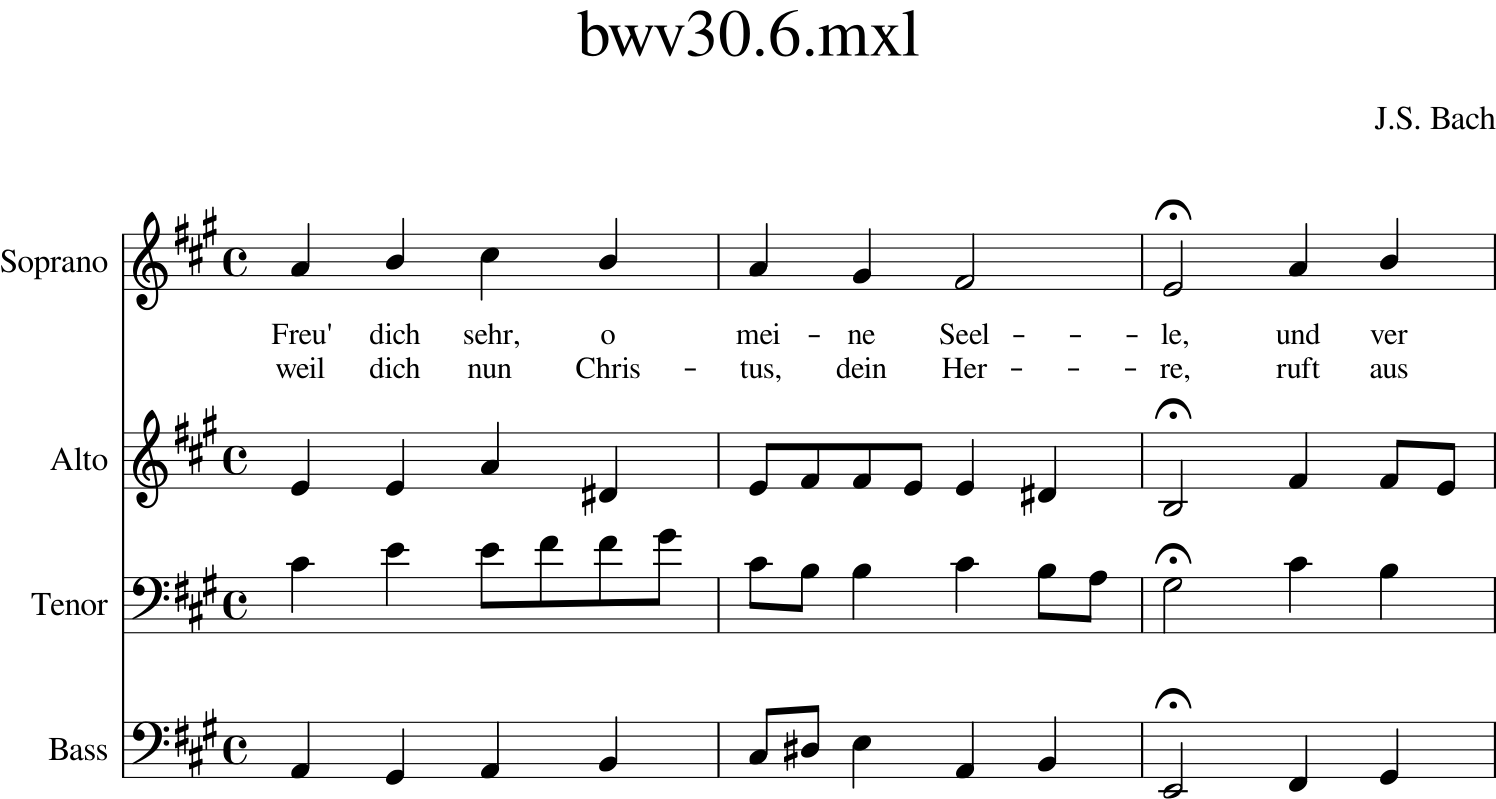

In [4]:
#| echo: true
#| eval: true
#| label: analyse

from music21 import *                     # activate library

### 1 Select one example from Bach chorales
bwv30_6 = corpus.parse('bach/bwv30.6.xml')# Take an example
#bwv30_6.measures(1, 3).show()             # Display 3 bars
bwv30_6.measures(1, 3).show()


![](https://github.com/tuomaseerola/emr/blob/main/nb/images/score1-1.png?raw=1)

### Harmonic analysis

Analyse chords using Roman numerals.

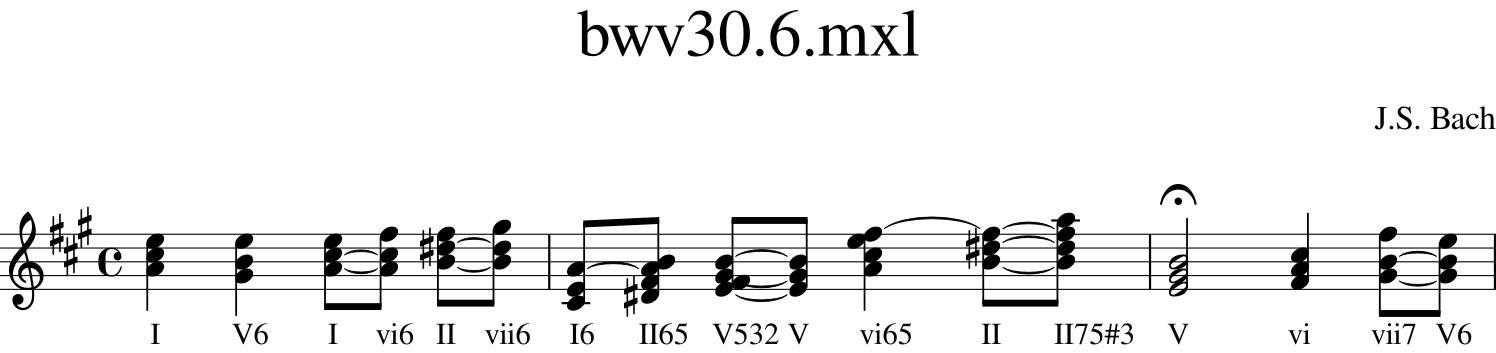

In [5]:
#| label: harmonic
bChords = bwv30_6.chordify()              # Slice the chords
for c in bChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
# Run analysis and add Roman numerals as lyrics
for c in bChords.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))
bChords.measures(0, 3).show()             # Display the result

![](https://github.com/tuomaseerola/emr/blob/main/nb/images/score2-1.png?raw=1)

### Metrical analysis

Carry out metrical analysis.

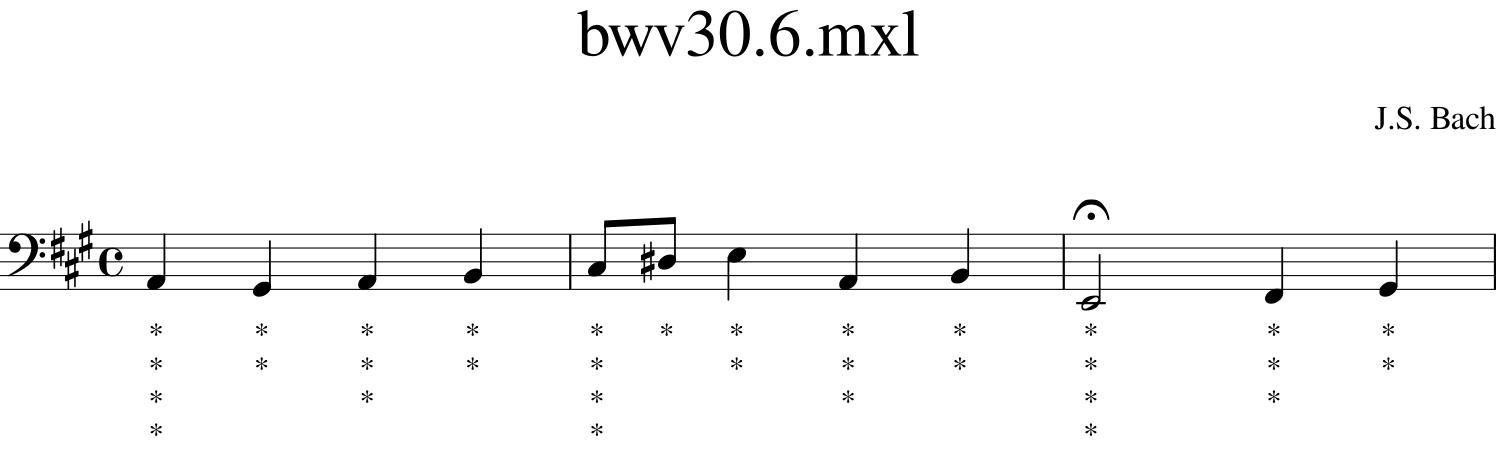

In [6]:
#| label: metrical
bass = bwv30_6.getElementById('Bass')    # Get the bass part
excerpt = bass.measures(1,3)             # Bar 1 through 3
analysis.metrical.labelBeatDepth(excerpt)# Metrical analysis
excerpt.show()                           # Display the results


![](https://github.com/tuomaseerola/emr/blob/main/nb/images/score3-1.png?raw=1)